<a href="https://colab.research.google.com/github/LeMat11/ME5920/blob/main/HW1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 45.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.28MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 11.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.79MB/s]


Subset size: 1000
One sample shape: torch.Size([1, 28, 28]) label: 1


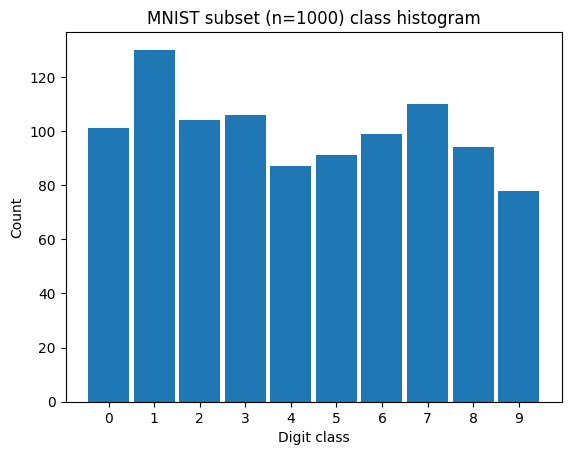

Batched images shape: torch.Size([40, 25, 1, 28, 28])
Batched labels shape: torch.Size([40, 25])


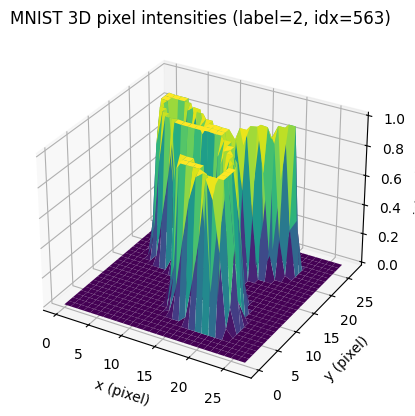

In [1]:
# HW 2 Simple Programming & Exploratory Analytics
# =========================
# HW 2.1 MNIST Images
# =========================

import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np

# ----------------------------
# 1) Download MNIST + subset of 1000
# ----------------------------
transform = transforms.ToTensor()  # returns tensor in [0,1], shape [1,28,28]

mnist_train = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Make a deterministic subset of 1000 samples (optional but nice for reproducibility)
torch.manual_seed(11)
indices = torch.randperm(len(mnist_train))[:1000].tolist()
mnist_subset = Subset(mnist_train, indices)

print("Subset size:", len(mnist_subset))
x0, y0 = mnist_subset[0]
print("One sample shape:", x0.shape, "label:", y0)  # should be torch.Size([1,28,28])

# ----------------------------
# 2) Plot histogram of classes in subset
# ----------------------------
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.figure()
plt.hist(labels, bins=np.arange(11)-0.5, rwidth=0.9)
plt.xticks(range(10))
plt.xlabel("Digit class")
plt.ylabel("Count")
plt.title("MNIST subset (n=1000) class histogram")
plt.show()

# ----------------------------
# 3) Batch images into groups of 25 using einops
#    Required shape: [1000,28,28] -> [num_batches, 25, 1, 28, 28]
# ----------------------------
# Stack subset into a single tensor
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # [1000,1,28,28]
labels_t = torch.tensor(labels)  # [1000]

# If you want the intermediate [1000,28,28] (as in prompt), squeeze channel then reshape back
images_1000_28_28 = images.squeeze(1)  # [1000,28,28]

# Make sure 1000 is divisible by 25
batch_size = 25
assert images_1000_28_28.shape[0] % batch_size == 0

# Rearrange to [num_batches, batch_size, 1, 28, 28]
batches = rearrange(images_1000_28_28, '(nb bs) h w -> nb bs 1 h w', bs=batch_size)
label_batches = rearrange(labels_t, '(nb bs) -> nb bs', bs=batch_size)

print("Batched images shape:", batches.shape)       # [40,25,1,28,28]
print("Batched labels shape:", label_batches.shape) # [40,25]

# ----------------------------
# 4) Randomly select an image and plot it in 3D
# ----------------------------
import random
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

idx = random.randint(0, len(mnist_subset)-1)
img, lab = mnist_subset[idx]  # img: [1,28,28]
img2d = img.squeeze(0).numpy()  # [28,28]

# Create x,y grid
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = img2d  # pixel intensity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')  # don't set colors per your default plotting preference
ax.set_xlabel("x (pixel)")
ax.set_ylabel("y (pixel)")
ax.set_zlabel("intensity")
ax.set_title(f"MNIST 3D pixel intensities (label={lab}, idx={idx})")
plt.show()


Cloning into 'ME5920'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 45 (delta 9), reused 23 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 40.85 MiB | 36.40 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/ME5920
total 32K
drwxr-xr-x 4 root root 4.0K Feb 18 05:07 .
drwxr-xr-x 1 root root 4.0K Feb 18 05:07 ..
-rw-r--r-- 1 root root 6.1K Feb 18 05:07 .DS_Store
drwxr-xr-x 8 root root 4.0K Feb 18 05:07 .git
drwxr-xr-x 3 root root 4.0K Feb 18 05:07 HW1
-rw-r--r-- 1 root root 1.1K Feb 18 05:07 LICENSE
-rw-r--r-- 1 root root    8 Feb 18 05:07 README.md
Data time range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Sampling interval (first two rows): 0 days 00:10:00
                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89

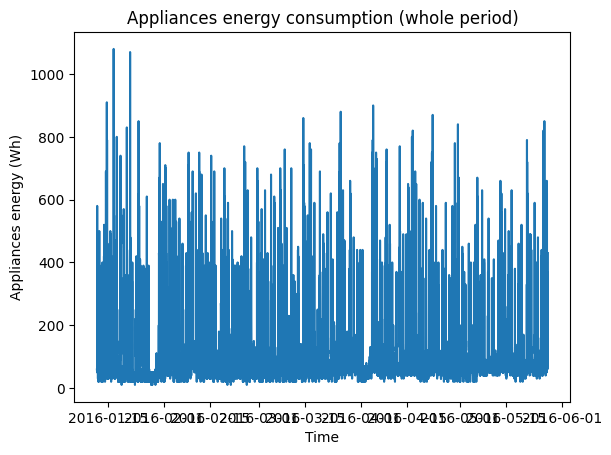

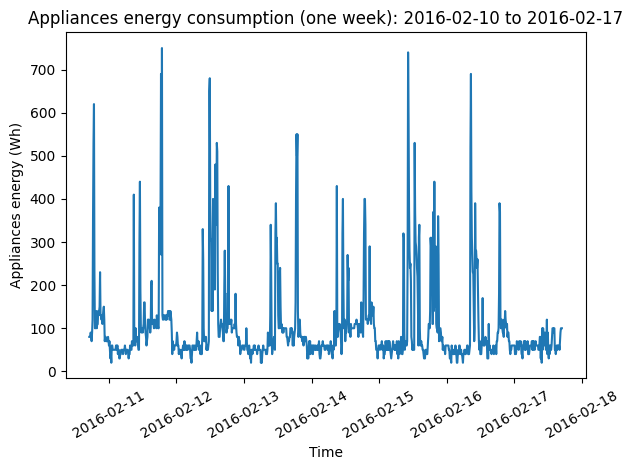

/tmp/ipython-input-3885360722.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energy_week_hourly = energy_week.resample("1H").mean()


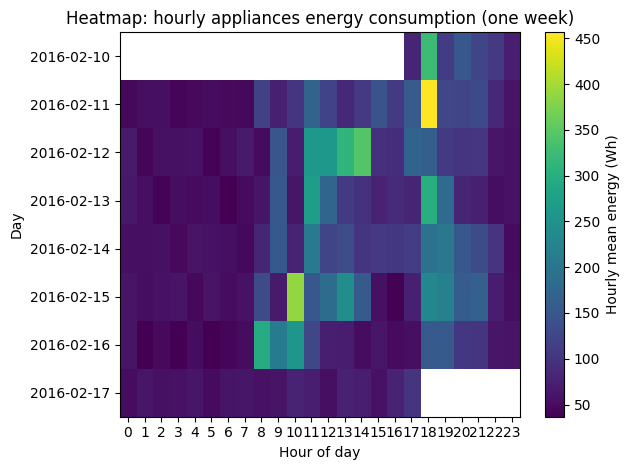

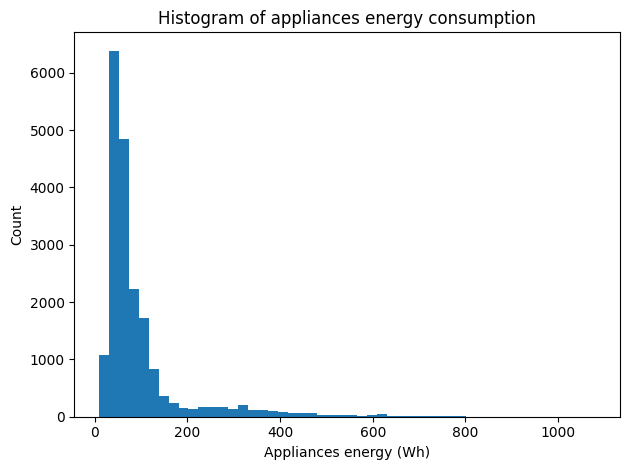

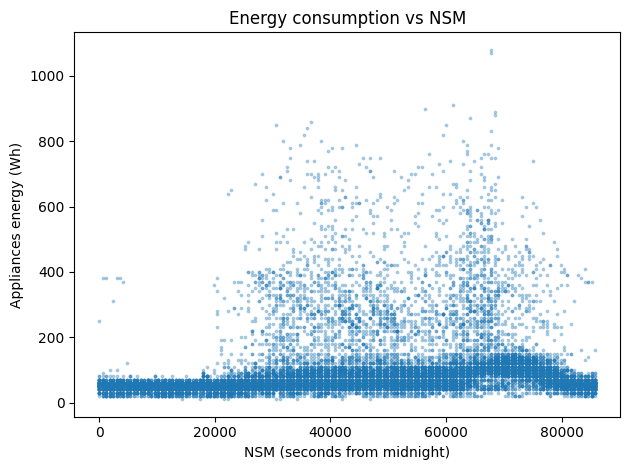

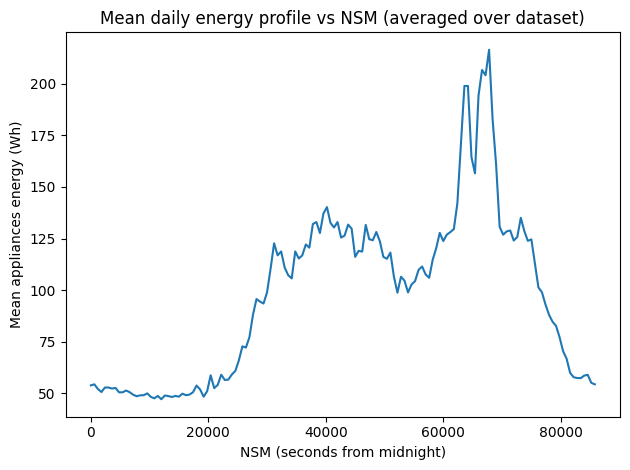

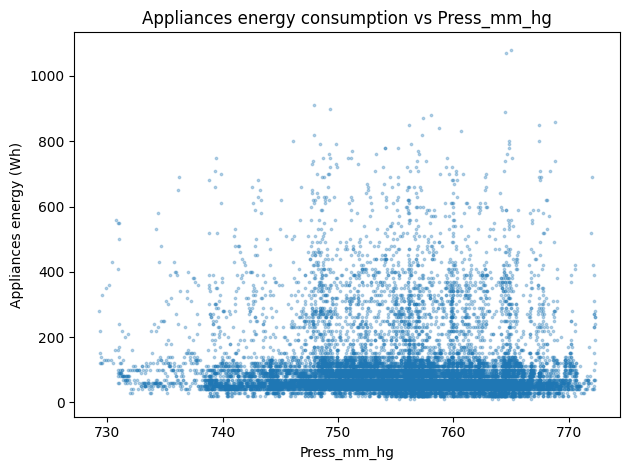

Correlation(Appliances, NSM): 0.21715217211236712
Correlation(Appliances, Press_mm_hg): -0.03488482908163533


In [2]:
# =========================
# HW1 2.2 Time Series
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------- Load data -------------
!rm -rf ME5920
!git clone https://github.com/LeMat11/ME5920.git
%cd ME5920
!ls -lah
csv_path = "HW1/energydata_complete.csv"  # adjust if your notebook is in a subfolder
df = pd.read_csv(csv_path)

# The dataset has a date column (usually named 'date')
# Convert to datetime and set as index for easy slicing
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")

# Appliances energy consumption column is typically named "Appliances"
energy = df["Appliances"]

print("Data time range:", df.index.min(), "to", df.index.max())
print("Sampling interval (first two rows):", df.index[1] - df.index[0])
print(df.head())

# ============= 1) Plot whole period + one week zoom =============
plt.figure()
plt.plot(energy.index, energy.values)
plt.xlabel("Time")
plt.ylabel("Appliances energy (Wh)")
plt.title("Appliances energy consumption (whole period)")
plt.show()

# Pick any one week to zoom (choose a start date you like)
# Here we auto-pick a week starting 30 days after the beginning to avoid edge effects
start_week = df.index.min() + pd.Timedelta(days=30)
end_week = start_week + pd.Timedelta(days=7)
energy_week = energy.loc[start_week:end_week]

plt.figure()
plt.plot(energy_week.index, energy_week.values)
plt.xlabel("Time")
plt.ylabel("Appliances energy (Wh)")
plt.title(f"Appliances energy consumption (one week): {start_week.date()} to {end_week.date()}")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ============= 2) Heatmap of hourly consumption for a week =============
# Build an hourly time series for that week
# (mean over each hour; you can also use sum depending on interpretation)
energy_week_hourly = energy_week.resample("1H").mean()

# Create a day x hour matrix: 7 days (rows) x 24 hours (cols)
# Use day labels and hour columns
# We map each timestamp to day index (0..6) and hour (0..23)
tmp = energy_week_hourly.to_frame("Appliances")
tmp["day"] = tmp.index.date
tmp["hour"] = tmp.index.hour

# Pivot to matrix (days x hours)
heat = tmp.pivot_table(index="day", columns="hour", values="Appliances", aggfunc="mean")

# Ensure hours 0..23 exist as columns (fill missing with NaN)
heat = heat.reindex(columns=range(24))

plt.figure()
plt.imshow(heat.values, aspect="auto")
plt.colorbar(label="Hourly mean energy (Wh)")
plt.xticks(ticks=np.arange(24), labels=np.arange(24))
plt.yticks(ticks=np.arange(len(heat.index)), labels=[str(d) for d in heat.index])
plt.xlabel("Hour of day")
plt.ylabel("Day")
plt.title("Heatmap: hourly appliances energy consumption (one week)")
plt.tight_layout()
plt.show()

# ============= 3) Histogram of energy consumption =============
plt.figure()
plt.hist(energy.values, bins=50)
plt.xlabel("Appliances energy (Wh)")
plt.ylabel("Count")
plt.title("Histogram of appliances energy consumption")
plt.tight_layout()
plt.show()

# ============= 4) NSM feature + plot energy vs NSM =============
# NSM = number of seconds from midnight
nsm = df.index.hour * 3600 + df.index.minute * 60 + df.index.second
df["NSM"] = nsm

plt.figure()
plt.scatter(df["NSM"], df["Appliances"], s=3, alpha=0.3)
plt.xlabel("NSM (seconds from midnight)")
plt.ylabel("Appliances energy (Wh)")
plt.title("Energy consumption vs NSM")
plt.tight_layout()
plt.show()

# Optional: show the daily pattern more clearly by averaging by NSM "bucket" (e.g., per minute)
# This is NOT required but makes the pattern obvious
df_tmp = df.copy()
df_tmp["NSM_min"] = (df_tmp["NSM"] // 60).astype(int)  # bucket by minute
sm_profile = df_tmp.groupby("NSM_min")["Appliances"].mean()

plt.figure()
plt.plot(sm_profile.index * 60, sm_profile.values)
plt.xlabel("NSM (seconds from midnight)")
plt.ylabel("Mean appliances energy (Wh)")
plt.title("Mean daily energy profile vs NSM (averaged over dataset)")
plt.tight_layout()
plt.show()

# ============= 5) Energy vs Press_mm_hg =============
# Column name in this dataset is typically "Press_mm_hg"
if "Press_mm_hg" not in df.columns:
    raise KeyError("Column 'Press_mm_hg' not found. Please check the CSV column names.")

plt.figure()
plt.scatter(df["Press_mm_hg"], df["Appliances"], s=3, alpha=0.3)
plt.xlabel("Press_mm_hg")
plt.ylabel("Appliances energy (Wh)")
plt.title("Appliances energy consumption vs Press_mm_hg")
plt.tight_layout()
plt.show()

# Optional: correlation numbers (helpful for your comment in 6)
corr_nsm = df["Appliances"].corr(df["NSM"])
corr_press = df["Appliances"].corr(df["Press_mm_hg"])
print("Correlation(Appliances, NSM):", corr_nsm)
print("Correlation(Appliances, Press_mm_hg):", corr_press)


**Comment on why NSM and Press_mm_hg are major contributing factors:**

- NSM (seconds from midnight) captures strong daily/diurnal usage patterns. Human activity and appliance usage
  (cooking, lighting, HVAC schedules, occupancy) typically repeat each day, so time-of-day is highly predictive.
- Press_mm_hg is linked to weather systems and seasonal/short-term atmospheric changes. Weather affects indoor
  conditions and HVAC/ventilation/dehumidification needs, which can indirectly drive appliance energy usage.
  Therefore, pressure can act as a proxy for weather-related energy demand variations.

Files found in HW1: ['Agricultural_Image_Analytics', 'airfoil_self_noise.dat', 'hw1.ipynb', 'energydata_complete.csv']
Loading: HW1/airfoil_self_noise.dat
Data shape: (1503, 6)


Frequency  AngleOfAttack  ChordLength  Velocity  SuctionThickness  \
0        800            0.0       0.3048      71.3          0.002663   
1       1000            0.0       0.3048      71.3          0.002663   
2       1250            0.0       0.3048      71.3          0.002663   
3       1600            0.0       0.3048      71.3          0.002663   
4       2000            0.0       0.3048      71.3          0.002663   

   SoundPressureLevel  
0             126.201  
1             125.201  
2             125.951  
3             127.591  
4             127.461


--- Descriptive Statistics ---


Mean      Variance       Median  Kurtosis  \
Frequency           2886.380572  9.938717e+06  1600.000000  5.708685   
AngleOfAttack          6.782302  3.502424e+01     5.400000 -0.412951   
ChordLength            0.136548  8.749868e-03     0.101600 -1.037964   
Velocity              50.860745  2.425116e+02    39.600000 -1.563951   
SuctionThickness       0.011140  1.729287e-04     0.004957  2.218903   
SoundPressureLevel   124.835943  4.759146e+01   125.721000 -0.314187   

                    Skewness         Range  
Frequency           2.137084  19800.000000  
AngleOfAttack       0.689164     22.200000  
ChordLength         0.457457      0.279400  
Velocity            0.235852     39.600000  
SuctionThickness    1.702165      0.058011  
SoundPressureLevel -0.418952     37.607000

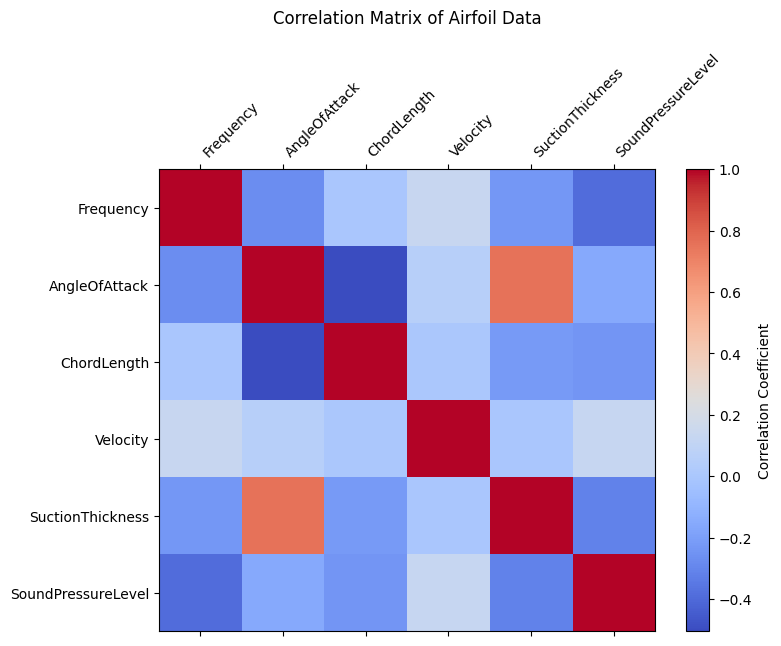

In [8]:
# =========================
# HW1 2.3 Multi-variate
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1) Browse/Find the file
# We look into HW1 for the dataset (if we are already in the repo root)
search_dir = "HW1"

files_in_dir = os.listdir(search_dir)
print("Files found in HW1:", files_in_dir)

# We expect a file like 'airfoil_self_noise.dat'
# Let's try to identify it automatically based on 'airfoil' in the name
possible_files = [f for f in files_in_dir if "airfoil" in f.lower()]
if len(possible_files) > 0:
    target_file = possible_files[0]
else:
    # Fallback if naming is different, but this is the standard name
    target_file = "airfoil_self_noise.dat"

file_path = os.path.join(search_dir, target_file)
print(f"Loading: {file_path}")

# 2) Load data
# The NASA airfoil dataset is typically tab-separated and has no header
try:
    # Try tab separator first
    df_air = pd.read_csv(file_path, sep='\t', header=None)
except:
    # Fallback to whitespace separator
    df_air = pd.read_csv(file_path, sep=r'\s+', header=None)

# Assign columns based on problem description:
# 1. Frequency, in Hz.
# 2. Angle of attack, in degrees.
# 3. Chord length, in meters.
# 4. Free-stream velocity, in meters per second.
# 5. Suction side displacement thickness, in meters.
# Output: Scaled sound pressure level, in decibels.
cols = [
    "Frequency",
    "AngleOfAttack",
    "ChordLength",
    "Velocity",
    "SuctionThickness",
    "SoundPressureLevel"
]

# Validate shape and assign columns
if df_air.shape[1] == len(cols):
    df_air.columns = cols
else:
    print(f"Warning: Data has {df_air.shape[1]} columns, expected {len(cols)}. Check delimiter.")

print("Data shape:", df_air.shape)
display(df_air.head())

# 3) Compute Descriptive Statistics
# Requirements: Mean, Variance, Median, Kurtosis, Skewness, Range
desc_stats = pd.DataFrame(index=df_air.columns)
desc_stats['Mean'] = df_air.mean()
desc_stats['Variance'] = df_air.var()
desc_stats['Median'] = df_air.median()
desc_stats['Kurtosis'] = df_air.kurtosis()
desc_stats['Skewness'] = df_air.skew()
desc_stats['Range'] = df_air.max() - df_air.min()

print("\n--- Descriptive Statistics ---")
display(desc_stats)

# Optional: Visualization for Multi-variate analysis (Correlation Matrix)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(df_air.corr(), cmap='coolwarm', aspect='auto')
fig.colorbar(cax, label="Correlation Coefficient")

# Set ticks and labels
ax.set_xticks(range(len(df_air.columns)))
ax.set_xticklabels(df_air.columns, rotation=45, ha='left')
ax.set_yticks(range(len(df_air.columns)))
ax.set_yticklabels(df_air.columns)

plt.title("Correlation Matrix of Airfoil Data", pad=20)
plt.show()

Saved to: HW1/Agricultural_Image_Analytics/augmented_100


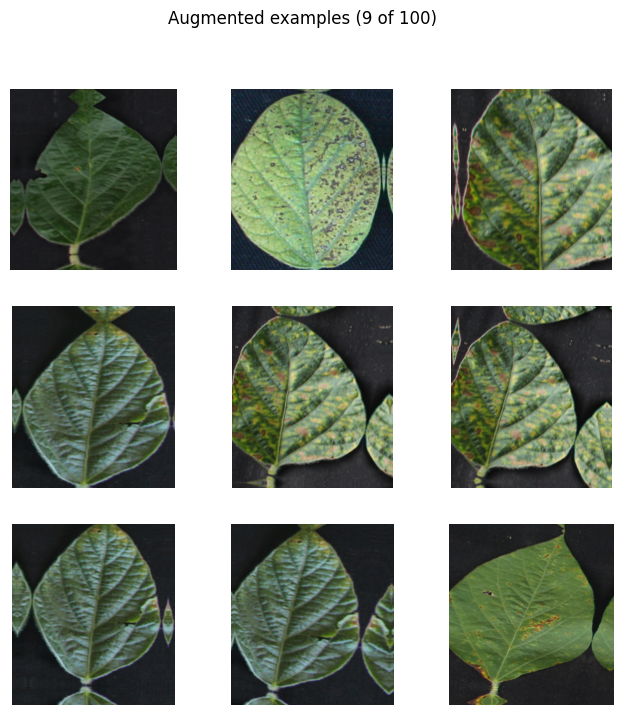

Patches shape: (650, 32, 32, 3)
Whitened patches shape: (650, 32, 32, 3)


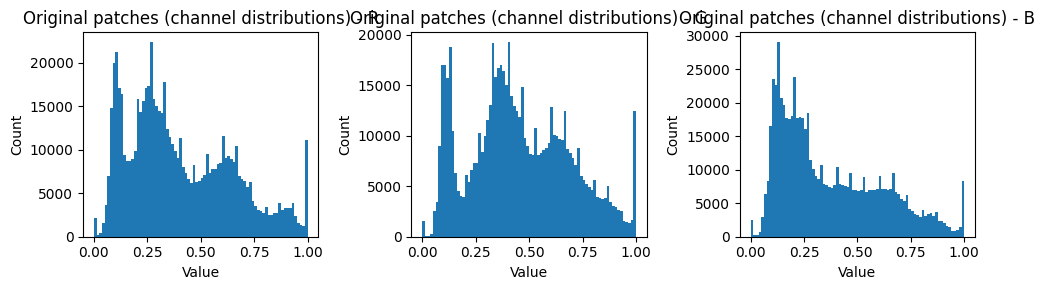

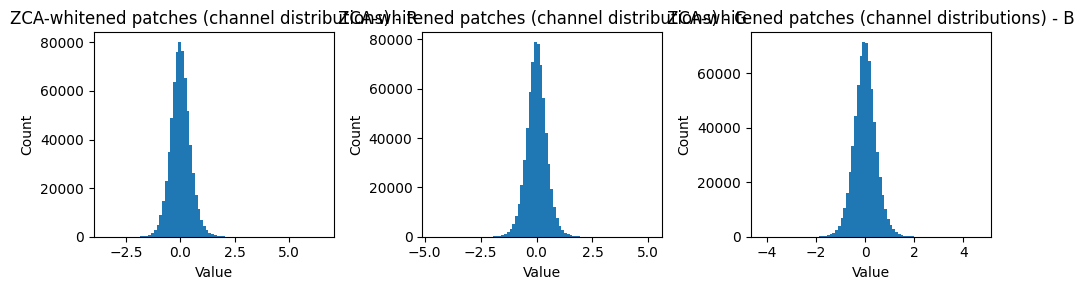

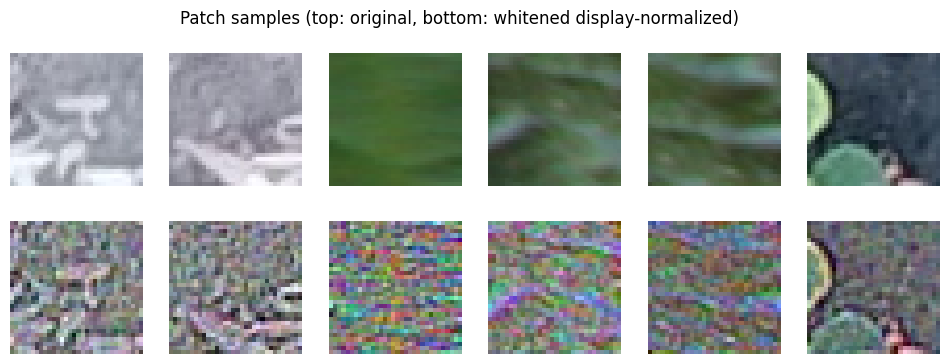

In [20]:
# HW1 3 Image Processing
# =========================
# HW1 3.1 Image preprocessing & transformation
# =========================

import os, glob, random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------------
# 0) Paths & image listing
# -------------------------
DATA_ROOT = "HW1/Agricultural_Image_Analytics"  # <-- change if your folder name differs
LEAF_DIR  = os.path.join(DATA_ROOT, "leaves")

OUT_AUG_DIR = os.path.join(DATA_ROOT, "augmented_100")
os.makedirs(OUT_AUG_DIR, exist_ok=True)

leaf_paths = sorted(glob.glob(os.path.join(LEAF_DIR, "*.*")))
leaf_paths = [p for p in leaf_paths if os.path.splitext(p.lower())[1] in [".png",".jpg",".jpeg"]]
assert len(leaf_paths) > 0, "No leaf images found."

def random_affine_warp(img_bgr):
    h, w = img_bgr.shape[:2]
    angle = random.uniform(-25, 25)
    scale = random.uniform(0.85, 1.15)
    tx    = random.uniform(-0.10*w, 0.10*w)
    ty    = random.uniform(-0.10*h, 0.10*h)

    M = cv2.getRotationMatrix2D((w/2, h/2), angle, scale)
    M[0, 2] += tx
    M[1, 2] += ty

    aff = cv2.warpAffine(img_bgr, M, (w, h),
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_REFLECT_101)

    src = np.float32([[0,0], [w-1,0], [w-1,h-1], [0,h-1]])
    jitter = 0.06
    dst = src.copy()
    dst[:,0] += np.random.uniform(-jitter*w, jitter*w, size=4)
    dst[:,1] += np.random.uniform(-jitter*h, jitter*h, size=4)

    P = cv2.getPerspectiveTransform(src, dst)
    out = cv2.warpPerspective(aff, P, (w, h),
                              flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_REFLECT_101)
    return out

# generate 100 augmented images from random source leaves
for i in range(100):
    src_path = random.choice(leaf_paths)
    img = cv2.imread(src_path, cv2.IMREAD_COLOR)
    if img is None:
        continue
    aug = random_affine_warp(img)
    cv2.imwrite(os.path.join(OUT_AUG_DIR, f"aug_{i:03d}.png"), aug)

print("Saved to:", OUT_AUG_DIR)

# show a small grid preview
preview_paths = sorted(glob.glob(os.path.join(OUT_AUG_DIR, "aug_*.png")))[:9]
plt.figure(figsize=(8,8))
for i, p in enumerate(preview_paths):
    im = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(im)
    plt.axis("off")
plt.suptitle("Augmented examples (9 of 100)")
plt.show()

# -------------------------
# 2) Extract local patches from ALL leaf images
# -------------------------
PATCH_SIZE = 32     # you can choose 32 or 64; must be << original size
PATCHES_PER_IMAGE = 50  # control total patch count
MAX_IMAGES = None   # set e.g. 50 if you want to limit

def read_rgb(path):
    bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if bgr is None:
        return None
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def sample_patches(img_rgb, patch_size=32, n_patches=50):
    h, w = img_rgb.shape[:2]
    ps = patch_size
    if h < ps or w < ps:
        return []
    patches = []
    for _ in range(n_patches):
        y = random.randint(0, h-ps)
        x = random.randint(0, w-ps)
        patch = img_rgb[y:y+ps, x:x+ps, :]
        patches.append(patch)
    return patches

# choose a subset of images if needed
paths_use = leaf_paths if MAX_IMAGES is None else leaf_paths[:MAX_IMAGES]

patch_list = []
for p in paths_use:
    im = read_rgb(p)
    if im is None:
        continue
    patch_list.extend(sample_patches(im, PATCH_SIZE, PATCHES_PER_IMAGE))

patches = np.stack(patch_list, axis=0)  # [N, ps, ps, 3]
patches = patches.astype(np.float32) / 255.0
print("Patches shape:", patches.shape)  # [N, 32, 32, 3]

# -------------------------
# 3) ZCA whitening on patches
# -------------------------
def zca_whiten(patches, eps=1e-5):
    """
    patches: [N, H, W, C] float32 in [0,1]
    returns: whitened patches same shape, plus (mean, ZCA_matrix) for reuse
    """
    N, H, W, C = patches.shape
    X = patches.reshape(N, -1)  # [N, D]
    mean = X.mean(axis=0, keepdims=True)
    Xc = X - mean

    # covariance: [D, D]
    # Use smaller trick: SVD on Xc / sqrt(N-1)
    sigma = np.dot(Xc.T, Xc) / (N - 1)

    # SVD
    U, S, _ = np.linalg.svd(sigma, full_matrices=False)
    ZCA = U @ np.diag(1.0 / np.sqrt(S + eps)) @ U.T

    Xw = Xc @ ZCA
    patches_w = Xw.reshape(N, H, W, C)
    return patches_w, mean, ZCA

# For speed/memory: you can whiten on a subset then transform all
# Here we whiten all patches; if too slow, set N_ZCA = 5000 etc.
patches_w, zca_mean, zca_mat = zca_whiten(patches, eps=1e-5)
print("Whitened patches shape:", patches_w.shape)

# -------------------------
# 4) Channel-by-channel distribution of PREWHITENED patches
# 5) Channel-by-channel distribution of ORIGINAL patches
# -------------------------
def plot_channel_hist(patches_arr, title, bins=80):
    # patches_arr: [N,H,W,C]
    C = patches_arr.shape[-1]
    plt.figure(figsize=(10,3))
    for c, name in enumerate(["R","G","B"][:C]):
        vals = patches_arr[..., c].ravel()
        plt.subplot(1, C, c+1)
        plt.hist(vals, bins=bins)
        plt.title(f"{title} - {name}")
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_channel_hist(patches,   "Original patches (channel distributions)")
plot_channel_hist(patches_w, "ZCA-whitened patches (channel distributions)")

# Optional: show a few patches before/after (note: whitened may look "weird", that's expected)
def show_patches(before, after, n=6):
    idx = np.random.choice(before.shape[0], size=n, replace=False)
    plt.figure(figsize=(12,4))
    for i, k in enumerate(idx):
        plt.subplot(2, n, i+1)
        plt.imshow(before[k])
        plt.axis("off")
        if i == 0:
            plt.ylabel("Original")

        # For display only: normalize whitened patch to 0..1
        w = after[k]
        w_disp = (w - w.min()) / (w.max() - w.min() + 1e-9)
        plt.subplot(2, n, n+i+1)
        plt.imshow(w_disp)
        plt.axis("off")
        if i == 0:
            plt.ylabel("Whitened")
    plt.suptitle("Patch samples (top: original, bottom: whitened display-normalized)")
    plt.show()

show_patches(patches, patches_w, n=6)

big boards: 4 small markers: 4


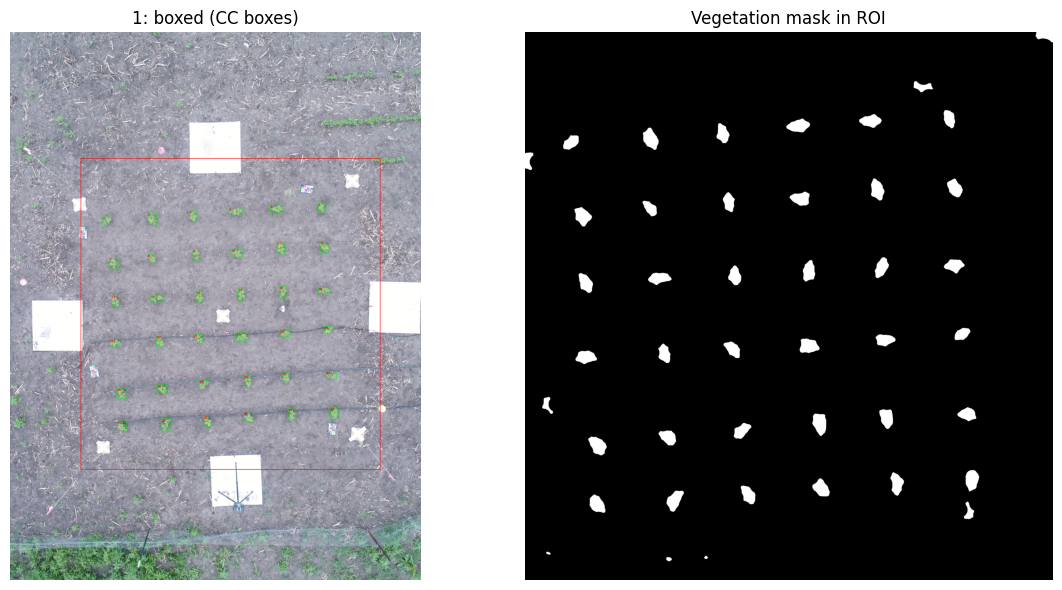

1: boxes=36 -> connected-components
Saved boxed: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/1_boxed.png
Saved crops: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/1_crops
big boards: 5 small markers: 31


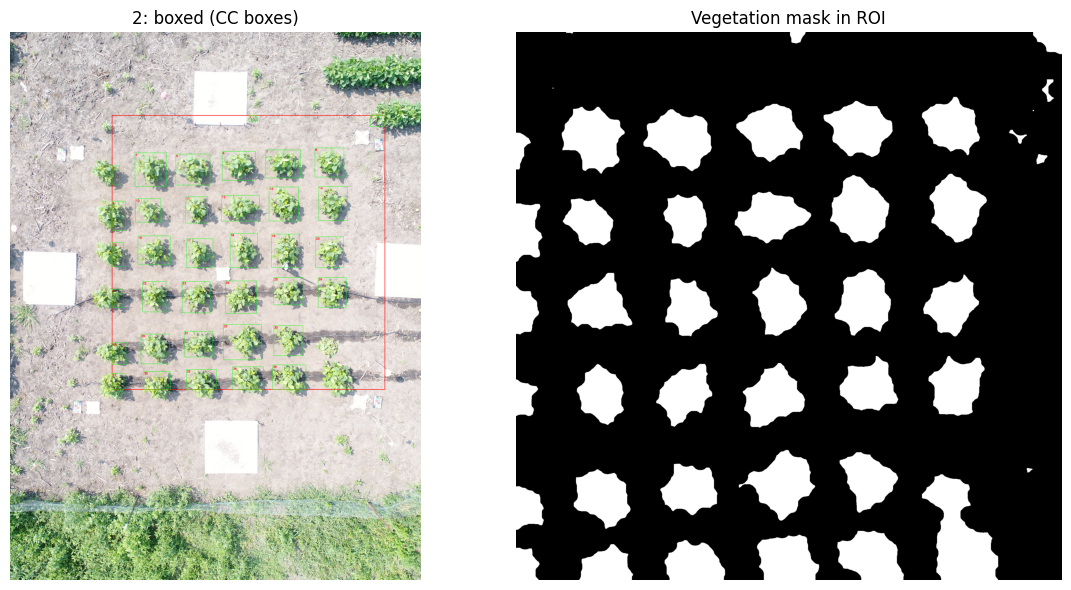

2: boxes=36 -> connected-components
Saved boxed: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/2_boxed.png
Saved crops: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/2_crops
big boards: 4 small markers: 4


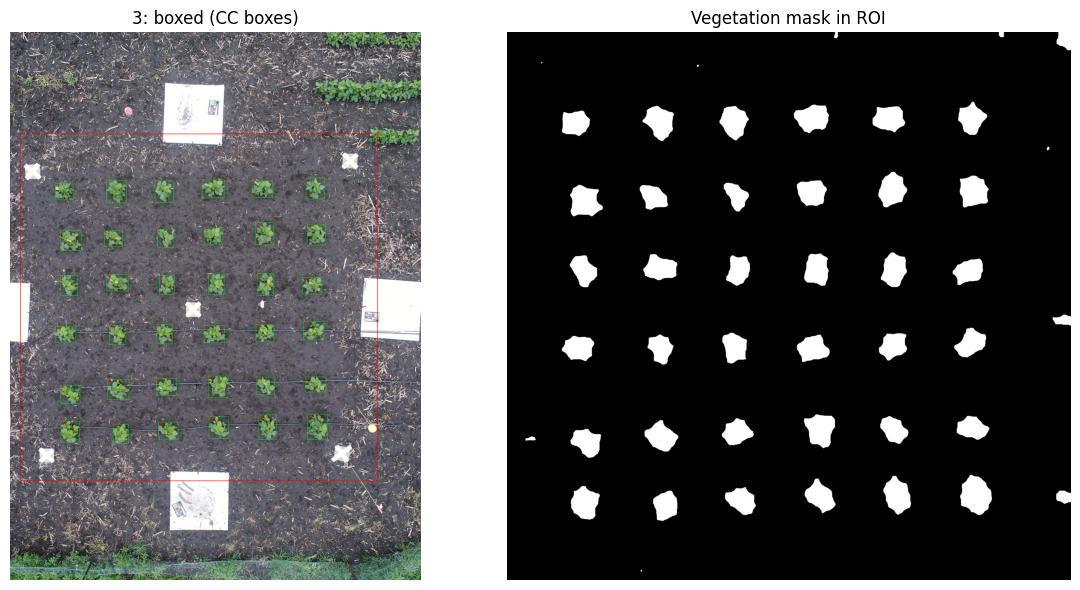

3: boxes=36 -> connected-components
Saved boxed: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/3_boxed.png
Saved crops: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/3_crops
big boards: 4 small markers: 4


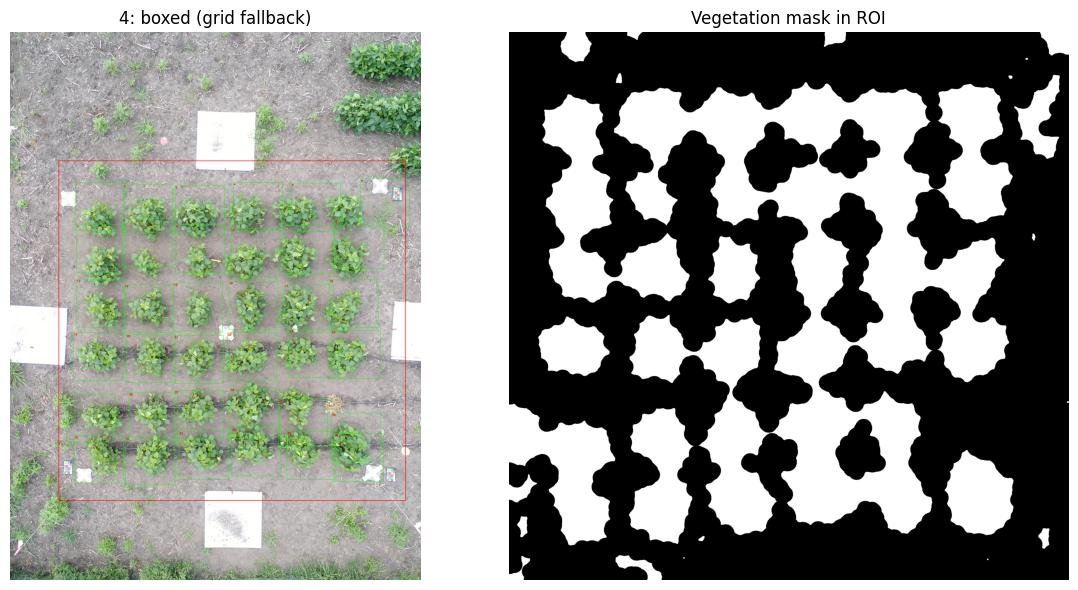

4: boxes=23 -> fallback
Saved boxed: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/4_boxed.png
Saved crops: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/4_crops
big boards: 4 small markers: 5


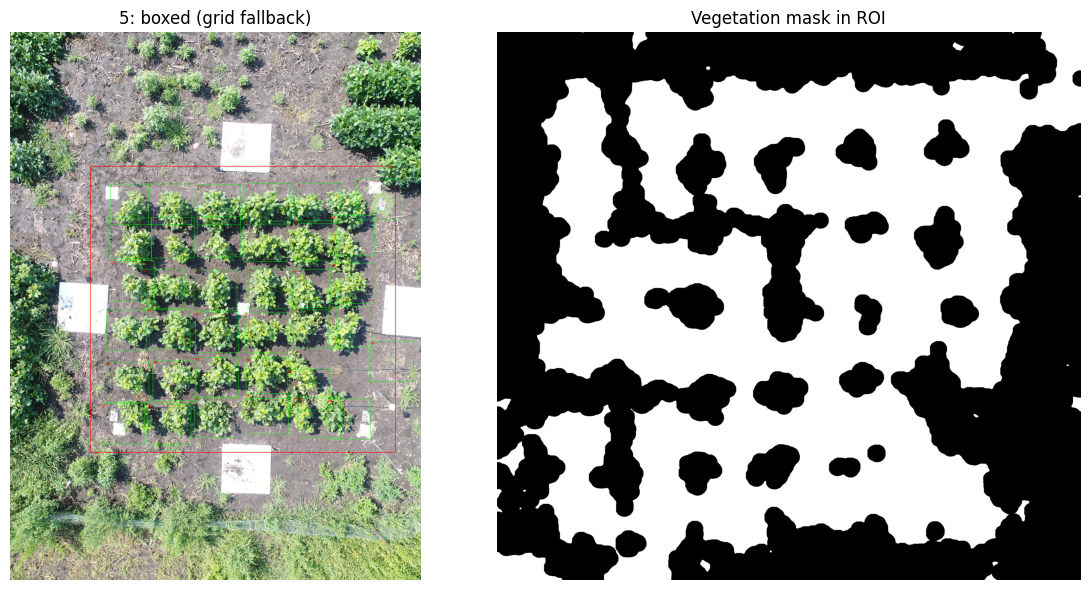

5: boxes=20 -> fallback
Saved boxed: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/5_boxed.png
Saved crops: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2/5_crops
All outputs in: /content/ME5920/HW1/Agricultural_Image_Analytics/segmentation_out_36_roi_v2


In [48]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

DATA_ROOT = "/content/ME5920/HW1/Agricultural_Image_Analytics"
OUT_DIR   = os.path.join(DATA_ROOT, "segmentation_out_36_roi_v2")
os.makedirs(OUT_DIR, exist_ok=True)

# ----------------------------
# A) White markers detection (big boards + small squares)
# ----------------------------
def white_mask(img_bgr):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    S = hsv[:,:,1]; V = hsv[:,:,2]
    m = ((V > 220) & (S < 80)).astype(np.uint8) * 255
    H,W = img_bgr.shape[:2]
    k = max(3, int(min(H,W)*0.008))
    ker = cv2.getStructuringElement(cv2.MORPH_RECT, (k,k))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN,  ker, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, ker, iterations=2)
    return m

def detect_white_components(img_bgr):
    m = white_mask(img_bgr)
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(m, connectivity=8)
    comps = []
    for i in range(1, num):
        x,y,w,h,area = stats[i]
        cx,cy = centroids[i]
        comps.append((x,y,w,h,area,cx,cy))
    # sort large->small
    comps = sorted(comps, key=lambda c: c[4], reverse=True)
    return comps, m

def robust_roi_from_markers(img_bgr, debug=False):
    """
    Use ALL white components (big + small) to define ROI:
    - Find big boards first (top/bottom/left/right)
    - Then refine ROI with small markers INSIDE the big-ROI:
      take min/max of their centroids to tighten.
    """
    H,W = img_bgr.shape[:2]
    comps, wm = detect_white_components(img_bgr)

    # Step 1: pick "big boards" by area threshold
    big = []
    for c in comps:
        x,y,w,h,area,cx,cy = c
        if area > 0.002 * H * W and 0.6 < (w/(h+1e-9)) < 1.6:
            big.append(c)
        if len(big) >= 6:  # enough
            break
    if len(big) < 4:
        # fallback: just take top 4 by area
        big = comps[:4]

    # classify big boards by centroid
    top    = min(big, key=lambda b: b[6])
    bottom = max(big, key=lambda b: b[6])
    left   = min(big, key=lambda b: b[5])
    right  = max(big, key=lambda b: b[5])

    margin = 20
    xL = int(left[0] + left[2] + margin)
    xR = int(right[0] - margin)
    yT = int(top[1] + top[3] + margin)
    yB = int(bottom[1] - margin)

    # clamp
    xL = max(0, min(W-1, xL)); xR = max(0, min(W, xR))
    yT = max(0, min(H-1, yT)); yB = max(0, min(H, yB))

    # Step 2: refine using small markers inside the big ROI
    # small markers have medium area (not huge boards, not noise)
    small = []
    for c in comps:
        x,y,w,h,area,cx,cy = c
        if cx < xL or cx > xR or cy < yT or cy > yB:
            continue
        if area < 0.00002*H*W:  # too small noise
            continue
        if area > 0.0015*H*W:   # too big (boards)
            continue
        # roughly square
        ar = w/(h+1e-9)
        if ar < 0.4 or ar > 2.5:
            continue
        small.append(c)

    if debug:
        print("big boards:", len(big), "small markers:", len(small))

    if len(small) >= 4:
        # tighten ROI to span small marker centroids (expanded slightly)
        cxs = np.array([c[5] for c in small])
        cys = np.array([c[6] for c in small])
        padx = int(0.08*(xR-xL))
        pady = int(0.08*(yB-yT))
        xL2 = int(np.clip(cxs.min()-padx, 0, W-1))
        xR2 = int(np.clip(cxs.max()+padx, 0, W))
        yT2 = int(np.clip(cys.min()-pady, 0, H-1))
        yB2 = int(np.clip(cys.max()+pady, 0, H))
        # only accept if reasonable
        if (xR2-xL2) > 0.3*W and (yB2-yT2) > 0.3*H:
            xL,yT,xR,yB = xL2,yT2,xR2,yB2

    # final sanity
    if xR <= xL or yB <= yT:
        xL,xR = int(0.15*W), int(0.85*W)
        yT,yB = int(0.15*H), int(0.85*H)

    roi = (xL,yT,xR,yB)
    return roi, big, small, wm

# ----------------------------
# B) Robust vegetation mask: ExG OR HSV-green
# ----------------------------
def veg_mask_robust(img_bgr_roi):
    H,W = img_bgr_roi.shape[:2]

    # ExG
    b,g,r = cv2.split(img_bgr_roi.astype(np.float32))
    exg = 2*g - r - b
    exg = cv2.GaussianBlur(exg, (5,5), 0)
    exg_norm = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, m_exg = cv2.threshold(exg_norm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # HSV green (wide range, tolerant)
    hsv = cv2.cvtColor(img_bgr_roi, cv2.COLOR_BGR2HSV)
    lower = np.array([25, 25, 25])
    upper = np.array([95, 255, 255])
    m_hsv = cv2.inRange(hsv, lower, upper)

    m = cv2.bitwise_or(m_exg, m_hsv)

    # morphology
    k_open  = max(3, int(min(H,W)*0.003))
    k_close = max(7, int(min(H,W)*0.015))
    ker_o = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k_open,k_open))
    ker_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k_close,k_close))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN,  ker_o, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, ker_c, iterations=2)

    return m

def boxes_from_mask(mask, target_n=36):
    H,W = mask.shape[:2]
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    comps=[]
    for i in range(1,num):
        x,y,w,h,area = stats[i]
        cx,cy = centroids[i]
        if area < 60:
            continue
        if area > 0.35*H*W:
            continue
        ar = max(w/(h+1e-9), h/(w+1e-9))
        if ar > 12:
            continue
        comps.append((x,y,w,h,area,cx,cy))
    if len(comps)==0:
        return []
    # keep pool then pick size-consistent
    comps = sorted(comps, key=lambda c: c[4], reverse=True)
    pool = comps[:max(target_n*5, 120)] if len(comps)>target_n else comps
    areas = np.array([c[4] for c in pool], float)
    med = np.median(areas)
    pool = sorted(pool, key=lambda c: abs(c[4]-med))[:target_n]
    return [(int(x),int(y),int(w),int(h),float(area),float(cx),float(cy)) for (x,y,w,h,area,cx,cy) in pool]

def sort_6x6_by_centers(boxes, n_rows=6):
    ys = np.array([b[6] for b in boxes]).reshape(-1,1)
    km = KMeans(n_clusters=n_rows, n_init=10, random_state=0).fit(ys)
    row_id = km.labels_
    rows=[]
    for r in range(n_rows):
        idx=[i for i in range(len(boxes)) if row_id[i]==r]
        if len(idx)==0:
            continue
        idx=sorted(idx, key=lambda i: boxes[i][5]) # by cx
        rows.append(idx)
    rows=sorted(rows, key=lambda idx: np.mean([boxes[i][6] for i in idx]))
    order=[]
    for idx in rows: order.extend(idx)
    return order

# ----------------------------
# C) Fallback: grid prior (always yields 36 crops)
# ----------------------------
def grid_fallback_centers(mask, n=6):
    """
    Split ROI into n x n cells; within each cell choose the pixel with max distance
    from background (center of vegetation) if exists, else cell center.
    """
    H,W = mask.shape[:2]
    centers=[]
    for r in range(n):
        for c in range(n):
            y1 = int(r*H/n); y2 = int((r+1)*H/n)
            x1 = int(c*W/n); x2 = int((c+1)*W/n)
            cell = mask[y1:y2, x1:x2]
            ys, xs = np.where(cell > 0)
            if len(xs) > 0:
                # pick median vegetation pixel (robust)
                cx = int(np.median(xs)) + x1
                cy = int(np.median(ys)) + y1
            else:
                cx = int((x1+x2)/2)
                cy = int((y1+y2)/2)
            centers.append((cx,cy))
    return centers

def crop_by_centers(img_bgr, centers_global, win_w, win_h, out_dir, base):
    H,W = img_bgr.shape[:2]
    crop_dir = os.path.join(out_dir, f"{base}_crops")
    os.makedirs(crop_dir, exist_ok=True)

    for k, (cx,cy) in enumerate(centers_global):
        x1 = max(0, cx - win_w//2)
        y1 = max(0, cy - win_h//2)
        x2 = min(W, x1 + win_w)
        y2 = min(H, y1 + win_h)
        x1 = max(0, x2 - win_w)
        y1 = max(0, y2 - win_h)
        crop = img_bgr[y1:y2, x1:x2]
        cv2.imwrite(os.path.join(crop_dir, f"{k+1:02d}.png"), crop)
    return crop_dir

# ----------------------------
# Main loop 1..5
# ----------------------------
for i in range(1,6):
    path = os.path.join(DATA_ROOT, f"{i}.JPG")
    img = cv2.imread(path)
    if img is None:
        print("Skip:", path);
        continue

    roi, big, small, wm = robust_roi_from_markers(img, debug=True)
    xL,yT,xR,yB = roi
    roi_img = img[yT:yB, xL:xR]

    mask = veg_mask_robust(roi_img)
    boxes = boxes_from_mask(mask, target_n=36)

    # Debug save masks
    cv2.imwrite(os.path.join(OUT_DIR, f"{i}_white_mask.png"), wm)
    cv2.imwrite(os.path.join(OUT_DIR, f"{i}_veg_mask.png"), mask)

    # Decide crop window from ROI size (your idea)
    roiH, roiW = mask.shape[:2]
    win_w = int(roiW / 6 * 0.85)
    win_h = int(roiH / 6 * 0.85)

    # If enough boxes -> use them; else fallback to grid
    use_fallback = len(boxes) < 30

    vis = img.copy()

    # draw ROI
    cv2.rectangle(vis, (xL,yT), (xR,yB), (0,0,255), 3)

    if not use_fallback:
        # convert boxes to global coords
        boxes_g = [(x+xL, y+yT, w,h,area,cx+xL,cy+yT) for (x,y,w,h,area,cx,cy) in boxes]
        boxes_g = sorted(boxes_g, key=lambda b: b[4], reverse=True)[:36]
        order = sort_6x6_by_centers(boxes_g, n_rows=6)

        # draw
        for k, idx in enumerate(order):
            x,y,w,h,area,cx,cy = boxes_g[idx]
            cv2.rectangle(vis, (x,y), (x+w,y+h), (0,255,0), 2)
            cv2.putText(vis, str(k+1), (x+3, y+25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                        (0,0,255), 2, cv2.LINE_AA)

        crop_dir = crop_by_centers(img,
                                   [(int(boxes_g[idx][5]), int(boxes_g[idx][6])) for idx in order],
                                   win_w, win_h, OUT_DIR, str(i))
    else:
        # grid fallback always yields 36
        centers_roi = grid_fallback_centers(mask, n=6)
        centers_global = [(cx+xL, cy+yT) for (cx,cy) in centers_roi]

        # draw centers as boxes
        for k,(cx,cy) in enumerate(centers_global):
            x1 = int(cx - win_w/2); y1 = int(cy - win_h/2)
            cv2.rectangle(vis, (x1,y1), (x1+win_w, y1+win_h), (0,255,0), 2)
            cv2.putText(vis, str(k+1), (x1+3, y1+25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                        (0,0,255), 2, cv2.LINE_AA)

        crop_dir = crop_by_centers(img, centers_global, win_w, win_h, OUT_DIR, str(i))

    boxed_path = os.path.join(OUT_DIR, f"{i}_boxed.png")
    cv2.imwrite(boxed_path, vis)

    # show
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title(f"{i}: boxed ({'grid fallback' if use_fallback else 'CC boxes'})")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap="gray")
    plt.title("Vegetation mask in ROI")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print(f"{i}: boxes={len(boxes)} -> {'fallback' if use_fallback else 'connected-components'}")
    print("Saved boxed:", boxed_path)
    print("Saved crops:", crop_dir)

print("All outputs in:", OUT_DIR)